# Iris Classification

## Intro
Type: Supervised learning  
Data: Iris features data corrected by amature researcher 

### Data pre-check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

In [2]:
#import Iris dataset.

from sklearn.datasets import load_iris
iris_dataset = load_iris() #dictionary -like  Bunch class object

In [3]:
print("Keys of Iris object: \n {}".format(iris_dataset.keys()))

Keys of Iris object: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(iris_dataset["DESCR"])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
#print(iris_dataset["DESCR"]) #class keys canbe shown with ["key"] after data

In [6]:
print(iris_dataset["target_names"]) #classification target

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris_dataset["feature_names"]) #features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
type(iris_dataset["data"]) #iris training data is stored into data

numpy.ndarray

In [9]:
type(iris_dataset["target"]) #iris prediction target data is stored into data

numpy.ndarray

In [10]:
iris_dataset["data"].shape #150 * 4 matrix. column number is size of samples. row num is size of features

(150, 4)

In [11]:
type(iris_dataset)

sklearn.utils.Bunch

In [12]:
iris_dataset['data'][:5] #show data till 5 column

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Data Separation
    
The reason why of separation is to test, evaluate the model.  
It's not good to use the training data as test data of model, coz the model was created by training data.  
So, to test the model, separation is necessary. normal separationrate is 75% for training data, 25% for test data.  
"training set" for training  
"test set", "hold out set" for test

In [14]:
from sklearn.model_selection import train_test_split #"train_test_split" func is to separate the training data
X_tr, X_te, y_tr, y_te = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0) 
#to delete bias, randomize necessary. 
#to get stable random level, set as "0"

In [15]:
print(X_tr.shape)

(112, 4)


In [16]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Observe 'data'  
Before analyze data, make the model, observation is must.  
The best way to observe is visualization.  
also to visualize more than 3 features data, pare plot

In [17]:
iris_dataframe = pd.DataFrame(X_tr, columns = iris_dataset.feature_names)

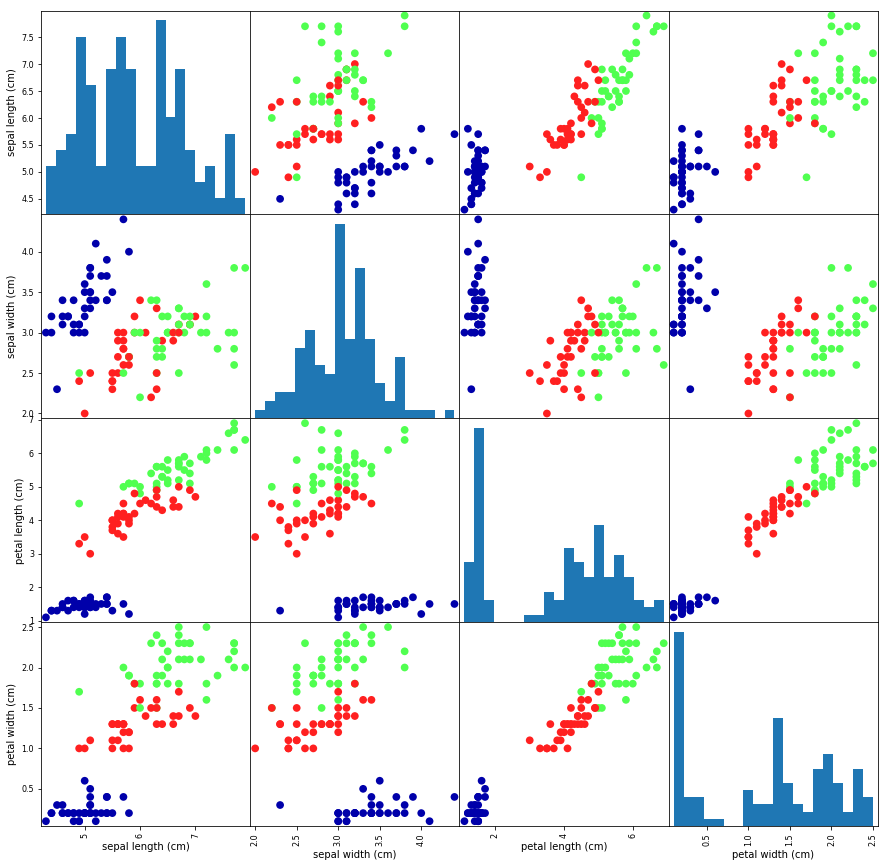

In [28]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c = y_tr, figsize = (15,15), marker = 'o', 
                                 hist_kwds = {'bins': 20}, s = 60, alpha = 8, cmap = mglearn.cm3)

### k-Nearest Neighbours  
#### modeling
target data would be labeled as same label of nearest sample(s) label.  
it's possible to set 'n' (n = nature num) as nearest sample data num, with those, prediction target data would be labeled as large num of class.  


In [19]:
from sklearn.neighbors import KNeighborsClassifier #KNN is in neighbors class. each of ML model is in Estimator class
knn = KNeighborsClassifier(n_neighbors = 1)

In [21]:
knn.fit(X_tr, y_tr) 
#use 'fit' method to fit the model to data
#after this calc, knn will be over written as supervised model
#each objects(model) have a 'fit' method
#the ans includes many variables to tuning the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### scoring  
to evaluate the model power, scoring is must.  
in this phase, separated train data is used.

In [26]:
y_pred = knn.predict(X_te) #prediction is done by 'predict' method
np.mean(y_pred == y_te)

0.9736842105263158

In [27]:
knn.score(X_te, y_te)#easy way to calc score

0.9736842105263158